# 145. BERT Fine-Tuning Tutorial with HuggingFace PyTorch Library

- [Chris McCormick and Nick Ryan](https://mccormickml.com/2019/07/22/BERT-fine-tuning/) tutorial 을 기초로 작성함


- Huggingface PyTorch 라이브러리와 함께 BERT를 사용하여 문장 분류에서 최첨단 성능에 근접하도록 모델을 빠르고 효율적으로 미세 조정하는 방법을 보여줍니다. 더 광범위하게, NLP에서 전이 학습을 실용적으로 적용하여 다양한 NLP 작업에서 최소한의 노력으로 고성능 모델을 만들 수 있습니다.

# Contents

# Introduction


## History

2018 년은 NLP에서 획기적인 해였습니다. 전이 학습, 특히 Allen AI의 ELMO, OpenAI의 Open-GPT 및 Google의 BERT와 같은 모델을 통해 연구원들은 최소한의 작업 별 미세 조정으로 여러 벤치 마크를 깰 수 있었고, 나머지 NLP 커뮤니티에 데이터를 적게 사용하여 쉽게 훈련 할 수있는 사전 훈련 된 모델을 제공 할 수있었습니다. 불행히도 NLP를 시작한 많은 사람들과 숙련 된 실무자들에게도이 강력한 모델의 이론과 실제 적용은 아직 잘 이해되지 않고 있습니다.


## What is BERT?

2018 년 후반에 출시 된 BERT (Transformer 의 양방향 인코더 표현)는 이 자습서에서 NLP 에서 전이학습 모델을 사용하기위한 더 나은 이해와 실제 지침을 제공하기 위해 사용할 모델입니다. BERT는 NLP 실무자가 다운로드하여 무료로 사용할 수있는 모델을 만드는 데 사용된 언어 표현을 사전 훈련(pre-training)된 model 입니다. 이 모델을 사용하여 텍스트 데이터에서 고품질 언어 기능을 추출하거나 downstream task (분류, 엔터티 인식, 질문 응답 등)를 자신의 데이터로 미세 조정하여 모델을 생성 할 수 있습니다.

이 자습서에서는 BERT를 수정하고 미세 조정하여 최신 결과를 신속하게 제공하는 강력한 NLP 모델을 만드는 방법을 설명합니다.


## Fine-Tuning 의 장점


구체적으로, 우리는 사전 훈련 된 BERT 모델을 취하고, 끝단에 훈련되지 않은 뉴런층을 추가하고, 분류 작업을 위해 새로운 모델을 훈련시킬 것입니다. 특정 NLP 작업에 적합한 특정 딥 러닝 모델 (CNN, BiLSTM 등)을 훈련 시키기보다 유리한 이유는 다음과 같습니다.

1. **Quicker Development**

    * 먼저, 사전 훈련 된 BERT 모델 가중치는 이미 우리 언어에 대한 많은 정보를 인코딩 합니다. 결과적으로, 미세 조정 된 모델을 학습하는 데 훨씬 적은 시간이 소요됩니다. 특정 NLP 작업에 대한 BERT 미세 조정을 위해 2-4 epoch 의 교육을 권장합니다 (원래 BERT 모델 또는 LSTM을 처음부터 교육하는 데 필요한 수백 시간의 GPU 작업 소요)
    

2. **Less Data**

    * 또한 사전 훈련 된 가중치 덕분에 이 방법을 사용하면 처음부터 빌드된 모델에 필요한 것보다 훨씬 작은 데이터로 모델을 미세 조정할 수 있습니다. NLP 모델을 처음부터 작성하는 주요 단점은 네트워크를 합리적인 정확도로 훈련시키기 위해 엄청나게 큰 데이터 세트가 필요하다는 것입니다. 이는 데이터 세트 작성에 많은 시간과 에너지를 투입해야한다는 것을 의미합니다. BERT를 미세 조정함으로써 훨씬 적은 양의 데이터로 모델을 효과적으로 훈련시킬 수 있습니다.
    

3. **Better Results**

    * 마지막으로,이 간단한 미세 조정 절차(일반적으로 BERT 위에 완전연결층 레이어 하나를 추가하고 몇 epoch 훈련)는 언어 추론, 의미론적 유사성, 질문 응답 등 다양한 작업에 대한 최소한의 작업 별 조정으로 최첨단 결과를 달성하는 것으로 나타났습니다. 특정 작업에서 잘 작동하는 것으로 보이는 사용자 지정 및 때로는 모호한 아키텍처를 구현하는 대신 BERT를 미세 조정하는 것이 더 나은(또는 최소한 동등한) 대안으로 보입니다.


### A Shift in NLP

- 학습을 이전하는 이러한 변화는 몇 년 전 컴퓨터비전에서 일어난 것과 같은 변화와 유사합니다. 컴퓨터 비전 작업을 위한 우수한 딥러닝 네트워크를 만들려면 수백만 개의 매개 변수를 사용하고 훈련하는 데 비용이 많이들 수 있습니다. 연구원들은 딥 네트워크가 계층적 특징 표현(가장 낮은 층의 가장자리와 같은 단순한 특징, 더 높은 층에서는 점차 더 복잡한 특징)을 배우는 것을 발견했습니다. 


- 매번 새로운 네트워크를 처음부터 교육하는 대신 일반화 된 이미지 기능을 갖춘 훈련된 네트워크의 하위 계층을 복사하여 다른 작업을 수행하는 다른 네트워크에서 사용할 수 있습니다. 사전 훈련 된 딥 네트워크를 다운로드하고 새로운 작업을 위해 신속하게 재교육하거나 추가 계층을 추가하는 것이 곧 일반적인 관행이 되었습니다. 네트워크를 처음부터 교육하는 고가의 프로세스보다 훨씬 선호됩니다. 


- 많은 사람들에게 2018 년에 사전 훈련된 딥 언어 모델 (ELMO, BERT, ULMFIT, Open-GPT 등)의 도입은 컴퓨터 비전 분야에서 보았던 Transfer Learning 으로의 전환과 동일한 신호를 NLP 분야에 보냅니다.

# 1. 환경 Setup

## 1.1. Using Colab GPU for Training


In [1]:
import tensorflow as tf
print(tf.__version__)

device_name = tf.test.gpu_device_name()

if device_name:
    print(device_name)
else:
    print('GPU not found')

2.2.0-rc4
/device:GPU:0


토치가 GPU를 사용하려면 GPU를 장치로 식별하고 지정해야합니다. 나중에 훈련 루프에서 데이터를 장치에 로드합니다.

In [2]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU 사용 :", torch.cuda.get_device_name())
else:
    device = torch.device("cpu")
    print("No GPU available, CPU 사용")

GPU 사용 : Tesla P100-PCIE-16GB


## 1.2. Hugging Face Library 설치


- 다음으로 Hugging Face의 [transformers](https://github.com/huggingface/transformers) 패키지를 설치하여 BERT 작업을 위한 pytorch 인터페이스를 제공합니다. (이 라이브러리에는 OpenAI의 GPT 및 GPT-2와 같은 다른 사전 훈련 된 언어 모델에 대한 인터페이스가 포함되어 있습니다.) 


- 우리는 pytorch 인터페이스를 선택했습니다. Tensorflow 는 높은 수준의 API 는 사용하기 쉽지만 어떻게 작동하는지에 대한 통찰력을 제공하지는 않고, 저수준 tensorflow 코드는 많은 세부 사항을 포함하지만 이해하기 어렵기 떄문입니다.


- 현재 Hugging Face 라이브러리는 BERT 작업에 가장 널리 사용되는 강력한 pytorch 인터페이스 입니다. 라이브러리에는 다양한 사전 훈련 된 Transformer 모델을 지원할 뿐만 아니라 특정 작업에 적합한 이러한 모델의 사전 빌드된 수정 사항도 포함되어 있습니다. 예를 들어, 이 튜토리얼에서는`BertForSequenceClassification`을 사용합니다.


- 이 라이브러리에는 토큰 분류, 질문 응답, 다음 문장 사전 결정 등을 위한 작업별 클래스도 포함되어 있습니다. 이러한 사전 빌드된 클래스를 사용하면 목적에 맞게 BERT를 수정하는 프로세스가 간소화됩니다.

In [3]:
!pip install transformers

     |████████████████████████████████| 573kB 2.8MB/s 
     |████████████████████████████████| 3.7MB 12.8MB/s 
     |████████████████████████████████| 890kB 29.1MB/s 
     |████████████████████████████████| 1.0MB 39.3MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=4146a55e7ffa1d1f593480aada3f1b964cb4200755108d6db1ddd3c1581b2929
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


이 노트북의 코드는 실제로 huggingface의 [run_glue.py](https://github.com/huggingface/transformers/blob/master/examples/run_glue.py) 예제 스크립트의 단순화 된 버전입니다.

`run_glue.py`는 실행하려는 GLUE 벤치 마크 작업과 사용하려는 사전 훈련 된 모델을 선택할 수있는 유용한 유틸리티입니다.

# 2. Loading CoLA Dataset


단일 문장 분류를 위해 [CoLA (Corpus of Linguistic Acceptability)](https://nyu-mll.github.io/CoLA/) 데이터 세트를 사용합니다. **문법적으로 정확하거나 틀린 것으로 표시**된 문장 세트입니다. 2018 년 5 월에 처음 출판되었으며 BERT와 같은 모델이 경쟁하는 **"GLUE Benchmark"**에 포함 된 테스트 중 하나입니다.


## 2.1. Download & Extract

`wget` 패키지를 사용하여 데이터 셋을 Colab 인스턴스의 파일 시스템으로 다운로드.

In [4]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=3e372e77d670ee383f99f9aa783d6e8d4060c934649aa4604324b85264e03f69
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


dataset 은 GitHub 에서 repo 가능: https://nyu-mll.github.io/CoLA/

In [5]:
import wget
import os

url = 'https://nyu-mll.github.io/CoLA/cola_public_1.1.zip'

if not os.path.exists('./cola_public_1.1.zip'):
    wget.download(url, './cola_public_1.1.zip')

if not os.path.exists('./cola_public'):
    !unzip cola_public_1.1.zip

Archive:  cola_public_1.1.zip
   creating: cola_public/
  inflating: cola_public/README      
   creating: cola_public/tokenized/
  inflating: cola_public/tokenized/in_domain_dev.tsv  
  inflating: cola_public/tokenized/in_domain_train.tsv  
  inflating: cola_public/tokenized/out_of_domain_dev.tsv  
   creating: cola_public/raw/
  inflating: cola_public/raw/in_domain_dev.tsv  
  inflating: cola_public/raw/in_domain_train.tsv  
  inflating: cola_public/raw/out_of_domain_dev.tsv  


## 2.2. Parse

파일 이름에서 `tokenized` 및 `raw` 버전의 데이터를 모두 사용할 수 있음을 알 수 있습니다.

**pre-trained BERT 를 적용하려면 BERT 모델에서 제공하는 tokenizer 를 사용해야하므로 `tokenized` version 의 data 는 사용할 수 없습니다.** 이는, 


(1) BERT 모델에 특정한 고정 어휘가 있고, 


(2) BERT tokenizer 가 out-of-vocabulary word 를 처리하는 특정 방법을 가지고 있기 때문입니다.

pandas 를 사용하여 트레이닝 세트를 구문 분석하고 해당 속성 및 데이터 포인트를 살펴 보겠습니다.

In [6]:
import numpy as np
import pandas as pd

df_train = pd.read_csv("./cola_public/raw/in_domain_train.tsv", delimiter='\t', header=None,
                             names=['sentence_source', 'label', 'label_notes', 'sentence'])
df_test = pd.read_csv("./cola_public/raw/in_domain_dev.tsv", delimiter='\t', header=None,
                             names=['sentence_source', 'label', 'label_notes', 'sentence'])
df_val = pd.read_csv("./cola_public/raw/out_of_domain_dev.tsv", delimiter='\t', header=None,
                             names=['sentence_source', 'label', 'label_notes', 'sentence'])
print(df_train.shape)
print(df_test.shape)
print(df_val.shape)
df_train.sample(10)

(8551, 4)
(527, 4)
(516, 4)


,sentence_source,label,label_notes,sentence
6597,g_81,0,*,"John offered, and Harry gave, Sally a Cadillac."
7224,sks13,1,NaN,What the spy became was too friendly with his ...
3428,ks08,1,NaN,A ball kicked the man.
4851,ks08,1,NaN,That Bill tried to discover which drawer Alice...
770,bc01,0,*,We love they.
7543,sks13,1,NaN,John heard their criticism of each other.
8176,ad03,1,NaN,The amoeba coughed and then it fainted.
665,bc01,1,NaN,John regards professors as strange and politic...
2754,l-93,1,NaN,Gwen exchanged the dress for a shirt.
7000,sgww85,1,NaN,John sang beautifully.


우리가 실제로 관심을 갖는 두 가지 속성은 `sentence` 와 `label` ("acceptibility judgment", 0=unacceptable, 1=acceptable) 입니다.

문법적으로 허용되지 않는 것으로 표시된 5 개의 문장이 있습니다. 이 작업이 감정 분석과 같은 것보다 얼마나 어려운지 주목하십시오!

In [8]:
# 문법적으로 unacceptable

df_train[df_train['label'] == 0].sample(5)[['sentence', 'label']]

,sentence,label
5483,It was so awful a picture as it first seemed.,0
3878,The defendant denied.,0
4067,That John coughs loves Bill.,0
26,Harry coughed us into a fit.,0
2201,Tessa sprained.,0


In [9]:
# 문법적으로 acceptable

df_train[df_train['label'] == 1].sample(5)[['sentence', 'label']]

,sentence,label
6381,Almost any pilot could be flying this plane.,1
2868,That chisel carved the statue.,1
8409,The men chuckle,1
4519,"You can do it, but you better not.",1
7860,Anson is incredibly difficult to please.,1


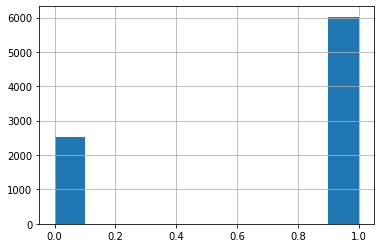

In [10]:
df_train['label'].hist()



훈련 세트의 문장과 레이블을 numpy ndarrays로 추출해 봅시다.

In [0]:
# Get the lists of sentences and their labels.
train_sentences = df_train.sentence.values
train_labels = df_train.label.values

test_sentences = df_test.sentence.values
test_labels = df_test.label.values

val_sentences = df_val.sentence.values
val_labels = df_val.label.values

# 3. Tokenization & Input Formatting

데이터 세트를 BERT를 학습 할 수있는 형식으로 변환합니다.

## 3.1. BERT Tokenizer


텍스트를 BERT에 제공하려면 토큰으로 분할 한 다음 tokenizer vocabulary 에서 해당 토큰을 색인에 매핑해야 합니다.

토큰화는 BERT에 포함 된 토크나이저에 의해 수행되어야 합니다. 아래 셀에서 uncased version 을 이용하여 이를 다운로드합니다.


In [12]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

결과를 보기 위해 토크 나이저를 한 문장에 적용 해 봅시다.




In [13]:
# Print the original sentence.
print(' Original: ', train_sentences[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(train_sentences[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(train_sentences[0])))

 Original:  Our friends won't buy this analysis, let alone the next one we propose.
Tokenized:  ['our', 'friends', 'won', "'", 't', 'buy', 'this', 'analysis', ',', 'let', 'alone', 'the', 'next', 'one', 'we', 'propose', '.']
Token IDs:  [2256, 2814, 2180, 1005, 1056, 4965, 2023, 4106, 1010, 2292, 2894, 1996, 2279, 2028, 2057, 16599, 1012]


실제로는 모든 문장을 변환 할 때,`tokenize`와`convert_tokens_to_ids`를 별도로 호출하지 않고`tokenize.encode` 함수를 사용하여 두 단계를 모두 처리합니다.

그러려면 BERT 의 formatting requirement 를 알아야 합니다.

## 3.2. BERT 의 formatting requirement

BERT 가 요구하는 input data formatting 은 다음을 수행해야 합니다.

1. 각 문장의 시작과 끝에 특별한 토큰을 추가 


2. 모든 문장을 하나의 일정한 길이로 padding 하거나 truncate  


3. "attetion mask"를 사용하여 real token 과 padding token 을 명시 적으로 구별

### Special Tokens



**`[SEP]`**

모든 문장의 끝에 특별한 `[SEP]` 을 추가해야 합니다.

이 토큰은 BERT 에 두 개의 개별 문장이 주어지고 무언가를 결정하도록 하는 **two-sentence tasks** 를 위한 것 입니다. (예 : 문장 A의 질문에 대한 답변을 문장 B에서 찾을 수 있는가 ?).


**`[CLS]`**

분류 작업을 위해서는 모든 문장의 시작 부분에 특수한 `[CLS]` 토큰을 붙여야합니다.

이 토큰에는 특별한 의미가 있습니다. BERT는 12 개의 트랜스포머 레이어로 구성됩니다. 각 Transformer 는 토큰 임베딩 목록을 가져와 출력에 동일한 수의 임베딩을 생성합니다 (물론 feature 값은 변경됨).

<img src="http://www.mccormickml.com/assets/BERT/padding_and_mask.png" width="600">
(Illustration of CLS token purpose)

최종 (12 번째) Transformer 의 출력에서 *classifier 가 ([CLS] 토큰에 해당하는) 첫 번째 embedding 만 사용 합니다*.
> "모든 sequence 의 첫 번째 토큰은 항상 special classification token (`[CLS]`)입니다. 이 토큰에 해당하는 마지막 hidden layer state 가 classification task 의 집약된 sequence 표현으로 사용됩니다."(from the [BERT paper](https://arxiv.org/pdf/1810.04805.pdf))

또한 BERT는 분류를 위해 이 [CLS] 토큰만 사용하도록 훈련되었으므로 이 단일 768-value 임베딩 벡터로 분류 단계에 필요한 모든 것을 인코딩하도록 모델이 동기부여 되었음을 알 수 있습니다.



### Sentence Length & Attention Mask



다양한 길이의 데이터 세트의 문장처리:

BERT에는 두 가지 제약 조건이 있습니다.
1. 모든 문장은 단일 고정 길이로 padding or truncated.
2. 최대 문장 길이는 512 토큰입니다.

패딩은 BERT vocabulary 에서 index 0 인 특별한 `[PAD]` 토큰으로 수행됩니다. 아래 그림은 "MAX_LEN" 8 인 경우 padding 방법을 보여줍니다.
<img src="http://www.mccormickml.com/assets/BERT/padding_and_mask.png" width="600">

"Attention Mask"는 1과 0으로 구성된 배열로, 어떤 토큰이 패딩되고 있지 않은지를 나타냅니다.






## 3.2. Sentences to IDs

`tokenizer.encode` 함수는 여러 단계를 한번에 수행합니다.
1. 문장을 토큰으로 분리.
2. 특별한`[CLS]`및`[SEP]`토큰을 추가
3. 토큰을 ID에 맵핑

단, truncate 는 해주지만 패딩은 처리하지 않습니다.

In [0]:
def encoding(sentences):
    input_ids = []
    
    for sent in sentences:
        encoded_sent = tokenizer.encode(sent, add_special_tokens=True)
        input_ids.append(encoded_sent)
        
    return input_ids

In [0]:
train_ids = encoding(train_sentences)
test_ids =  encoding(test_sentences)
val_ids =   encoding(val_sentences)

print(len(train_ids))
print(train_sentences[0])
print(train_ids[0])
print(tokenizer.decode(train_ids[0]))
print()
print(len(test_ids))
print(test_sentences[0])
print(test_ids[0])
print(tokenizer.decode(test_ids[0]))
print()
print(len(val_ids))
print(val_sentences[0])
print(val_ids[0])
print(tokenizer.decode(val_ids[0]))

8551
Our friends won't buy this analysis, let alone the next one we propose.
[101, 2256, 2814, 2180, 1005, 1056, 4965, 2023, 4106, 1010, 2292, 2894, 1996, 2279, 2028, 2057, 16599, 1012, 102]
[CLS] our friends won't buy this analysis, let alone the next one we propose. [SEP]

527
The sailors rode the breeze clear of the rocks.
[101, 1996, 11279, 8469, 1996, 9478, 3154, 1997, 1996, 5749, 1012, 102]
[CLS] the sailors rode the breeze clear of the rocks. [SEP]

516
Somebody just left - guess who.
[101, 8307, 2074, 2187, 1011, 3984, 2040, 1012, 102]
[CLS] somebody just left - guess who. [SEP]


## 3.3. Padding & Truncating

시퀀스가 모두 동일한 길이 `MAX_LEN` 이 되도록 pad and truncate.

In [0]:
print('Max sentence length: ', max([len(sen) for sen in train_ids]))

Max sentence length:  47


test 및 validation set 의 최대 크기를 모르므로 max length 47 보다 약간 큰 MAX_LEN = 64를 선택하고 패딩을 적용

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_LEN = 64
print('\nPadding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))

train_sequences = pad_sequences(train_ids, maxlen=MAX_LEN, truncating='post', padding='post')
test_sequences = pad_sequences(test_ids, maxlen=MAX_LEN, truncating='post', padding='post')
val_sequences = pad_sequences(val_ids, maxlen=MAX_LEN, truncating='post', padding='post')

print(train_sequences[0])
print(test_sequences[0])
print(val_sequences[0])


Padding token: "[PAD]", ID: 0
[  101  2256  2814  2180  1005  1056  4965  2023  4106  1010  2292  2894
  1996  2279  2028  2057 16599  1012   102     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
[  101  1996 11279  8469  1996  9478  3154  1997  1996  5749  1012   102
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
[ 101 8307 2074 2187 1011 3984 2040 1012  102    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0

## 3.4. Attention Masks

BERT vocabulary 는 ID 0 을 사용하지 않으므로 토큰 ID가 0 이면 padding 이고 그렇지 않으면 실제 토큰입니다.

In [0]:
def masking(sequences):
    attention_masks = []
    
    for sent in sequences:
        att_mask = [int(token_id > 0) for token_id in sent]
        attention_masks.append(att_mask)
    return attention_masks

In [0]:
train_masks = masking(train_sequences)
test_masks = masking(test_sequences)
val_masks = masking(val_sequences)

print(train_masks[0])
print(test_masks[0])
print(val_masks[0])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## 3.5. Converting to PyTorch Data Types

우리 모델은 numpy.ndarrays 대신 PyTorch 텐서가 필요하므로 모든 데이터 세트 변수를 변환



In [0]:
train_sequences = torch.tensor(train_sequences).to(torch.int64)
test_sequences  = torch.tensor(test_sequences ).to(torch.int64)
val_sequences  = torch.tensor(val_sequences ).to(torch.int64)

train_labels = torch.tensor(train_labels).to(torch.int64)
test_labels  = torch.tensor(test_labels).to(torch.int64)
val_labels  = torch.tensor(val_labels).to(torch.int64)

train_masks  = torch.tensor(train_masks ).to(torch.int64)
test_masks  = torch.tensor(test_masks).to(torch.int64)
val_masks  = torch.tensor(val_masks).to(torch.int64)

또한 토치 DataLoader 클래스를 사용하여 데이터 세트에 대한 반복자를 만듭니다. 이는 for 루프와 달리 반복자와 함께 전체 데이터 세트를 메모리에 로드 할 필요가 없기 때문에  훈련 중에 메모리를 절약하는 데 도움이됩니다.

### 특정 task 에서 BERT를 fine-tuning 할 때 배치 크기가 16 또는 32 로 하라고 recommend 하고 있습니다.

In [0]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size = 32

# training set 에 대한 DataLoader 생성
train_data = TensorDataset(train_sequences, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# validation set 에 대한 DataLoader 생성
test_data = TensorDataset(test_sequences, test_masks, test_labels)
test_sampler = RandomSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

val_data = TensorDataset(val_sequences, val_masks, val_labels)
val_sampler = RandomSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

# 4. Train Our Classification Model

입력 데이터가 올바르게 포맷 되었으므로 BERT를 미세 조정할 때입니다.

## 4.1. BertForSequenceClassification

이 task 에서는 분류를 위한 출력을 제공할 수 있도록 pre-trained BERT 모델을 먼저 수정한 후 엔드-투-엔드로 전체 모델이 우리 task 에 적합해질 때까지 데이터 집합에 대한 모델 training 을 계속해야 합니다.

다행히도 huggingface pytorch 설치에는 다양한 NLP 작업을 위해 설계된 일련의 인터페이스가 포함되어 있습니다. 이러한 인터페이스는 모두 하나의 훈련된 BERT 모델을 기반으로 구축되었지만 각각 특정 NLP 작업을 수용하도록 설계된 서로 다른 top layer 및 출력 유형이 있습니다.

fine-tuning 을 위해 제공되는 현재의 class list 입니다.:
* BertModel
* BertForPreTraining
* BertForMaskedLM
* BertForNextSentencePrediction
* **BertForSequenceClassification** - 이 tutorial 에서 사용 예정
* BertForTokenClassification
* BertForQuestionAnswering

documentation 위치 [here](https://huggingface.co/transformers/v2.2.0/model_doc/bert.html) 참조



우리가 사용할 것은 [BertForSequenceClassification](https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#bertforsequenceclassification)입니다.  

이것은 sentence classifier 로 사용할 분류를 위한 단일 linear layer 가 추가 된 통상적 BERT 모델입니다. 입력 데이터를 공급할 때 사전 훈련 된 전체 BERT 모델과 추가된 훈련되지 않은 classification layer 가 특정 task 에 대해 훈련됩니다.

For sequence pairs:

    tokens:         [CLS] is this jack ##son ##ville ? [SEP] no it is not . [SEP]

    token_type_ids:   0   0  0    0    0     0       0   0   1  1  1  1   1   1

For single sequences:

    tokens:         [CLS] the dog is hairy . [SEP]

    token_type_ids:   0   0   0   0  0     0   0

사용 가능한 몇 가지 사전 훈련 된 BERT 모델이 있습니다. "bert-base-uncased"는 소문자만 있는 version 이고 두 버전 중 더 작은 버전 ("base"대 "large")을 의미합니다.

`from_pretrained` 문서 참조 [here](https://huggingface.co/transformers/v2.2.0/main_classes/model.html#transformers.PreTrainedModel.from_pretrained), 추가 parameter [here](https://huggingface.co/transformers/v2.2.0/main_classes/configuration.html#transformers.PretrainedConfig).

In [0]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", num_labels=2,   # binary,  >= 3 multi-class task
    output_attentions=False,                   # model 이 attention weights 를 반환할지 여부
    output_hidden_states=False              # model 이 모든 hidden-state 를 반환할지 여부
)

model.to(device)

참고삼아 아래의 names, dimensions of the weights 출력.

1. The embedding layer.
2. The first of the twelve transformers.
3. The output layer.




In [0]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())
print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')
for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')
for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

## 4.2. Optimizer & Learning Rate Scheduler

이제 모델이 로드 되었으므로 저장된 모델 내에서 training hyperparameters 를 가져와야합니다.

fine-tuning 에 다음 값들이 recommend 됩니다. 
- 배치 크기 : 16, 32 (DataLoader 를 만들 때 32 를 선택).
- Learning rate(Adam) : 5e-5, 3e-5, 2e-5 (2e-5 사용)
- 에포크 수 : 2, 3, 4 (4를 사용).

The epsilon parameter `eps = 1e-8` zero divide 방지를 위한 매우 작은 숫자임. (from [here](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)).

AdamW(Adam algorithm with weight decay fix) optimizer 는 다음 참조 `run_glue.py` [here](https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L109).

In [0]:
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)

* get_linear_schedule_with_warmup  
 Create a schedule with a learning rate that decreases linearly after
linearly increasing during a warmup period.

In [0]:
from transformers import get_linear_schedule_with_warmup

epochs = 4
# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs
print(total_steps)

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer,
                                num_warmup_steps=0,  # Default value in run_glue.py
                                num_training_steps=total_steps)

1072


## 4.3. Training Loop

accuracy 계산을 위한 helper function 정의

In [0]:
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

경과시간 formatting 을 위한 helper function.


In [0]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

- model.eval() : 모든 layer 가 eval mode 로 동작. batchnorm, dropout layers 가 training mode 아닌 eval mode 로 동작.
- torch.no_grad() : autograd engine 을 deactivate 하여 memory 절약 및 speed 향상.

In [0]:
import random

seed_val = 42

random.seed(42)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

loss_values = []

for epoch_i in range(0, epochs): 
    
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    st = time.time()
    total_loss = 0

    model.train()

    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            elapsed = format_time(time.time() - st)
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'
                        .format(step, len(train_dataloader), elapsed))

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()        

        outputs = model(b_input_ids, token_type_ids=None, # sentence 구분 [0,0,0,0,1,1,1,1]
                        attention_mask=b_input_mask, 
                        labels=b_labels)
        
        # The call to `model` always returns a tuple, so we need to pull the 
        # loss value out of the tuple (loss, logits, hidden_states, attentions)
        loss = outputs[0]
        total_loss += loss.item()

        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # training data 의 평균 loss 계산
    avg_train_loss = total_loss / len(train_dataloader)            
    
    # learning curve 시각화를 위해 loss value 저장.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - st)))
        
    # ========================================
    #               Validation
    # ========================================
    # 각 training epoch 이 끝나면, Test set 에 대한 performance 측정.

    print("")
    print("Running Validation...")

    st = time.time()

    model.eval()

    # Tracking variables 
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # Evaluate data for one epoch
    for batch in test_dataloader:
        
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        
        # Telling the model not to compute or store gradients, saving memory and
        # speeding up validation
        with torch.no_grad():        
            outputs = model(b_input_ids, token_type_ids=None, 
                            attention_mask=b_input_mask)
            
        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        logits = outputs[0]

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        
        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy

        # Track the number of batches
        nb_eval_steps += 1

    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - st)))

print("")
print("Training complete!")


======== Epoch 1 / 4 ========
Training...


/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha)


  Batch    40  of    268.    Elapsed: 0:00:09.
  Batch    80  of    268.    Elapsed: 0:00:17.
  Batch   120  of    268.    Elapsed: 0:00:25.
  Batch   160  of    268.    Elapsed: 0:00:33.
  Batch   200  of    268.    Elapsed: 0:00:42.
  Batch   240  of    268.    Elapsed: 0:00:50.

  Average training loss: 0.49
  Training epcoh took: 0:00:55

Running Validation...
  Accuracy: 0.81
  Validation took: 0:00:01

======== Epoch 2 / 4 ========
Training...
  Batch    40  of    268.    Elapsed: 0:00:08.
  Batch    80  of    268.    Elapsed: 0:00:16.
  Batch   120  of    268.    Elapsed: 0:00:25.
  Batch   160  of    268.    Elapsed: 0:00:33.
  Batch   200  of    268.    Elapsed: 0:00:41.
  Batch   240  of    268.    Elapsed: 0:00:49.

  Average training loss: 0.30
  Training epcoh took: 0:00:55

Running Validation...
  Accuracy: 0.86
  Validation took: 0:00:01

======== Epoch 3 / 4 ========
Training...
  Batch    40  of    268.    Elapsed: 0:00:08.
  Batch    80  of    268.    Elapsed: 0:00:17

### 전체 batche 에 대한 training loss 를 시각화

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


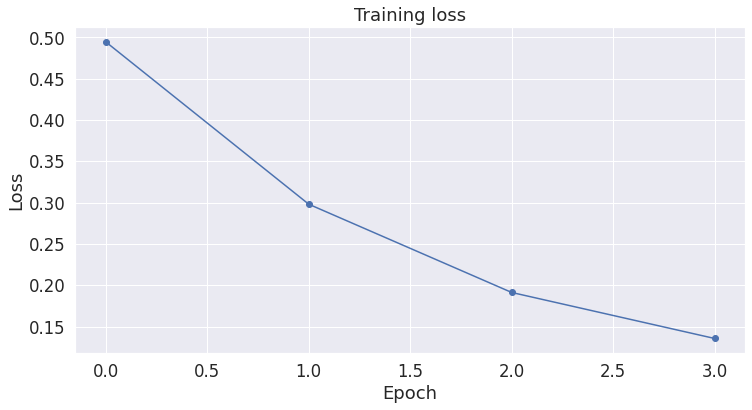

In [0]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# seaborn plot style
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(loss_values, 'b-o')

# Label the plot.
plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

# 5. Performance On Validation Set

* 이제 훈련 세트에서와 마찬가지로 홀드아웃 데이터 세트를 로드하고 입력을 준비합니다. 그런 다음 [Matthew의 상관 계수](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html)를 사용하여 예측을 평가합니다. 이는 더 폭넓은 NLP 커뮤니티에서 CoLA 성능 평가에 사용하는 메트릭이기 때문입니다. 
* +1 : 완전 예측, 0 : 평균 랜덤 예측, -1 : 역예측
$$MCC = \frac{TP \times TN - FP \times FN}{\sqrt{(TP+FP)(TP+FN)(TN+FP)(TN+FN)}}$$

### 5.1. Data Preparation


훈련 데이터에 테스트 데이터 세트를 준비하기 위해했던 것과 동일한 단계를 모두 적용해야합니다.

## 5.2. Evaluate on Test Set


테스트 세트가 준비되면 Fine-tuning 된 모델을 적용하여 테스트 세트에 대한 예측을 생성 할 수 있습니다.

In [0]:
print('Predicting labels for {:,} test sentences...'.format(len(val_sentences)))

model.eval()

# Tracking variables 
predictions , true_labels = [], []

for batch in val_dataloader:

  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]

  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 516 test sentences...
    DONE.


CoLA 벤치 마크의 정확도는 "[매튜스 상관 계수](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html)"(MCC)를 사용하여 측정됩니다.

클래스가 불균형하기 때문에 MCC를 사용합니다.


In [0]:
print(f'Positive samples:{df_val.label.sum()} of {len(df_val.label)} ({df_val.label.sum() / len(df_val.label) * 100.0:.2f}%)')

Positive samples:354 of 516 (68.60%)


In [0]:
from sklearn.metrics import matthews_corrcoef

matthews_set = []

# Evaluate each test batch using Matthew's correlation coefficient
print('Calculating Matthews Corr. Coef. for each batch...')

# For each input batch...
for i in range(len(true_labels)):
  
  # The predictions for this batch are a 2-column ndarray (one column for "0" 
  # and one column for "1"). Pick the label with the highest value and turn this
  # in to a list of 0s and 1s.
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
  
  # Calculate and store the coef for this batch.  
  matthews = matthews_corrcoef(true_labels[i], pred_labels_i)                
  matthews_set.append(matthews)

Calculating Matthews Corr. Coef. for each batch...


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


최종 점수는 전체 테스트 세트를 기준으로하지만, 개별 배치의 점수를보고 배치 간 메트릭의 변동성을 파악하십시오.

각 배치에는 (516 % 32) = 4 개의 테스트 문장 만있는 마지막 배치를 제외하고 32 개의 문장이 있습니다.


In [0]:
matthews_set

[0.39405520311955033,
 0.7679476477883045,
 0.14907119849998599,
 0.45693676673168776,
 0.6695340634119862,
 0.49382916465843113,
 0.6078306738548308,
 0.5141671091113803,
 0.6454972243679028,
 0.2809003238667948,
 0.5691908489504616,
 0.5204956780951701,
 0.5202453946507077,
 0.589872830909857,
 0.5962847939999439,
 0.458682472293863,
 0.0]

In [0]:
# Combine the predictions for each batch into a single list of 0s and 1s.
flat_predictions = [item for sublist in predictions for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = [item for sublist in true_labels for item in sublist]

# Calculate the MCC
mcc = matthews_corrcoef(flat_true_labels, flat_predictions)

print('MCC: %.3f' % mcc)

MCC: 0.513


약 30 분 만에 하이퍼 파라미터 튜닝 (학습 속도, 에포크 (epoch), 배치 크기, ADAM 속성 등 조정)을 수행하지 않아도 좋은 점수를 얻을 수 있었습니다.

You can also look at the official leaderboard [here](https://gluebenchmark.com/leaderboard/submission/zlssuBTm5XRs0aSKbFYGVIVdvbj1/-LhijX9VVmvJcvzKymxy). 

(작은 데이터 세트 크기로 인해?) 정확도는 다른 random seed 에 따라 크게 다를 수 있습니다.


# Appendix


## A1. Saving & Loading Fine-Tuned Model

In [0]:
import os

output_dir = './model_save/'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print(f"Saving model to {output_dir}")

# `save_pretrained()` 을 이용하여 trained model, configuration, tokenizer 저장
# `from_pretrained()` 를 이용하여 reload
model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Good practice: save your training arguments together with the trained model
# torch.save(args, os.path.join(output_dir, 'training_args.bin'))


Saving model to ./model_save/


('./model_save/vocab.txt',
 './model_save/special_tokens_map.json',
 './model_save/added_tokens.json')

파일 크기 check

In [0]:
!ls -l --block-size=K ./model_save/

total 427960K
-rw-r--r-- 1 root root      2K Apr 30 12:24 config.json
-rw-r--r-- 1 root root 427719K Apr 30 12:24 pytorch_model.bin
-rw-r--r-- 1 root root      1K Apr 30 12:24 special_tokens_map.json
-rw-r--r-- 1 root root      1K Apr 30 12:24 tokenizer_config.json
-rw-r--r-- 1 root root    227K Apr 30 12:24 vocab.txt


model weights 는 약 418 megabyte 의 크기이다.

In [0]:
!ls -l --block-size=M ./model_save/pytorch_model.bin

-rw-r--r-- 1 root root 418M Apr 30 12:24 ./model_save/pytorch_model.bin
